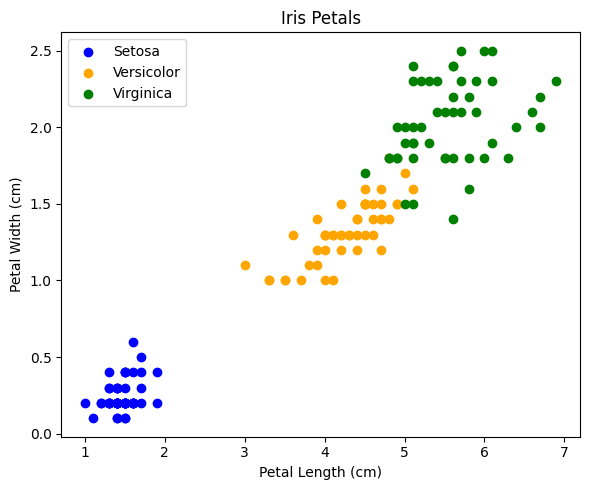

In [ ]:
######### Question 1 ############

import pandas as pd
import matplotlib.pyplot as plt

#loading the csv file
file_path = '/content/iris.csv'  # enter the location of iris.csv
iris_data = pd.read_csv(file_path)

#separating each species to colour code
setosa = iris_data[iris_data['species'] == 'setosa']
versicolor = iris_data[iris_data['species'] == 'versicolor']
virginica = iris_data[iris_data['species'] == 'virginica']

fig, ax = plt.subplots(figsize=(6,5))  #contructing the plot

#colour
ax.scatter(setosa['petal_length'], setosa['petal_width'], color='blue', label='Setosa')
ax.scatter(versicolor['petal_length'], versicolor['petal_width'], color='orange', label='Versicolor')
ax.scatter(virginica['petal_length'], virginica['petal_width'], color='green', label='Virginica')

#contructing the legend
ax.set_xlabel('Petal Length (cm)', fontsize=10)
ax.set_ylabel('Petal Width (cm)', fontsize=10)
ax.set_title('Iris Petals', fontsize=12)
ax.legend(title='')

plt.tight_layout()
plt.show()

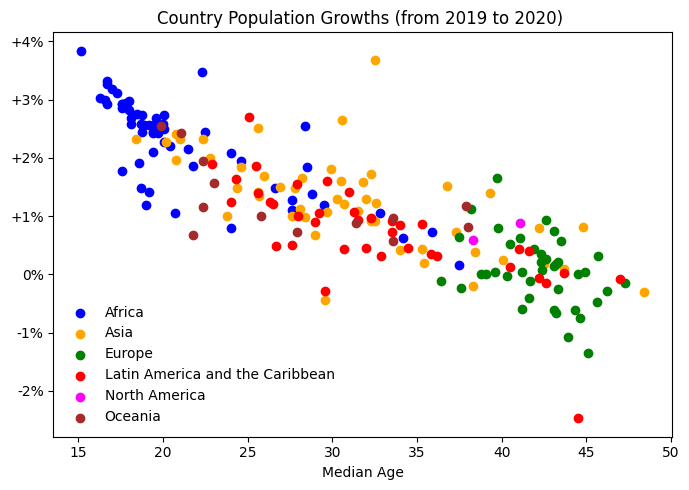

In [ ]:
########## Question 2 ############

import pandas as pd
import matplotlib.pyplot as plt

# loading the csv file
population_data = pd.read_csv('/content/population.csv')

# filtering the data
filtered_data = population_data[
    (population_data['Year'] == 2020) &
    ~population_data['MedianAge'].isna() &
    (population_data['MedianAge'] >= 15)
]

# colours for continents
continent_colors = {
    'Africa': 'blue',
    'Asia': 'orange',
    'Europe': 'green',
    'Latin America and the Caribbean': 'red',
    'North America': 'magenta',
    'Oceania': 'brown'
}

# figure
fig, ax = plt.subplots(figsize=(7, 5))


# Plot data for each continent
for continent, color in sorted(continent_colors.items()):  # Sortting
    continent_data = filtered_data[filtered_data['Continent'] == continent]
    ax.scatter(
        continent_data['MedianAge'],
        continent_data['Yearly%Change'],
        label=continent,
        color=color
    )


# settting axis labels and title
ax.set_xlabel('Median Age', fontsize=10)
ax.set_title('Country Population Growths (from 2019 to 2020) ', fontsize=12)
ax.set_xticks(range(15, 51, 5))
ax.set_yticks([4, 3, 2, 1, 0, -1, -2])
ax.set_yticklabels([f'+{i}%' if i > 0 else f'{i}%' for i in [4, 3, 2, 1, 0, -1, -2]])

# customizing legend
ax.legend( loc='lower left', frameon=False)

plt.tight_layout()
plt.show()

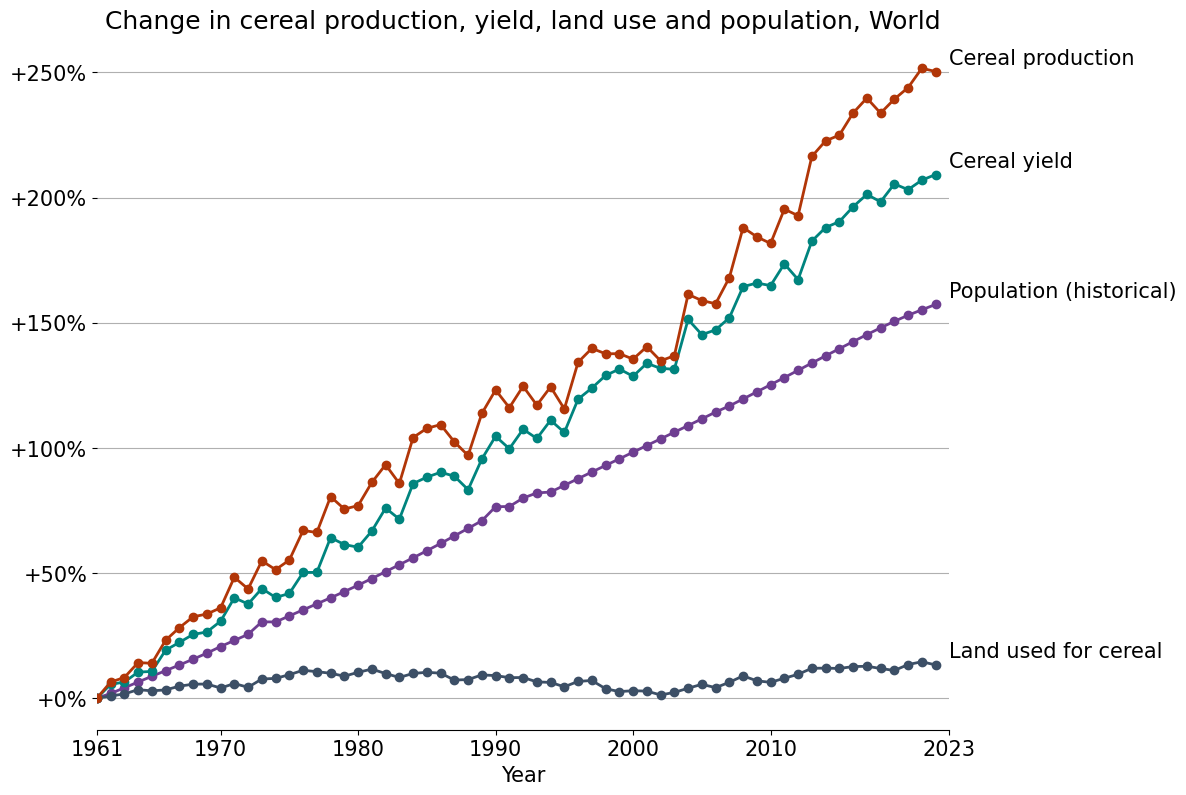

In [ ]:
############ Question 3 ###############


import pandas as pd
import matplotlib.pyplot as plt

# loading the csv file
df = pd.read_csv('cereal-land-use.csv')

# filtering the data
df_filtered = df[(df['Year'] >= 1961) & (df['Year'] <= 2022)].copy()



# calculating the weighted average for cereal yield each year
df_filtered['Total Production'] = df_filtered['Yield (tonnes per hectare)'] * df_filtered['Area Harvested (hectares)']
total_production_by_year = df_filtered.groupby('Year')['Total Production'].sum()
total_area_by_year = df_filtered.groupby('Year')['Area Harvested (hectares)'].sum()
yield_by_year = total_production_by_year / total_area_by_year

# calculating the percentage
yield_1961 = yield_by_year.loc[1961]
yield_percentage_change = ((yield_by_year - yield_1961) / yield_1961) * 100



# Group by 'Year' and sum for each year
population_by_year = df_filtered.groupby('Year')['Population (historical)'].sum()

land_by_year = df_filtered.groupby('Year')['Area Harvested (hectares)'].sum()

production_by_year = df_filtered.groupby('Year')['Production (tonnes)'].sum()



# calculating the percentage increase
population_1961 = population_by_year.loc[1961]
population_percentage_change = ((population_by_year - population_1961) / population_1961) * 100

land_1961 = land_by_year.loc[1961]
land_percentage_change = ((land_by_year - land_1961) / land_1961) * 100

yield_1961 = yield_by_year.loc[1961]
yield_percentage_change = ((yield_by_year - yield_1961) / yield_1961) * 100

production_1961 = production_by_year.loc[1961]
production_percentage_change  = ((production_by_year - production_1961) / production_1961) *100



# slottng the data for every year
plt.figure(figsize=(11, 9))
plt.plot(population_percentage_change.index, population_percentage_change.values, marker='o', color='#6E3E91', linestyle='-', linewidth=2, markersize=6)
plt.plot(land_percentage_change.index, land_percentage_change.values, marker='o', color='#3C4F66', linestyle='-', linewidth=2, markersize=6)
plt.plot(yield_percentage_change.index, yield_percentage_change.values, marker='o', color='#00847E', linestyle='-', linewidth=2, markersize=6)
plt.plot(production_percentage_change.index, production_percentage_change.values, marker='o', color='#B13608', linestyle='-', linewidth=2, markersize=6)


# setting the labels and title
plt.xlabel('Year', fontsize=15)
plt.ylabel('', fontsize=15)
plt.title('Change in cereal production, yield, land use and population, World', fontsize=18)

# adding text
data = [
    (population_percentage_change, 'Population (historical)', 'black'),
    (land_percentage_change, 'Land used for cereal', 'black'),
    (yield_percentage_change, 'Cereal yield', 'black'),
    (production_percentage_change, 'Cereal production', 'black')
]
for series, label, color in data:
    last_year = series.index[-1]
    last_value = series.values[-1]
    plt.text(last_year + 1, last_value + 3, label, fontsize=15, color=color, ha='left')

# y-axis
plt.yticks(range(0, 251, 50), [f'+{i}%' for i in range(0, 251, 50)], fontsize=15)

# x-axis
plt.xlim(1961, 2023)
plt.xticks([1961, 1970, 1980, 1990, 2000, 2010, 2023], fontsize=15)

# removing spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# only horizontal lines
plt.grid(axis='y')

plt.show()

In [ ]:
#Attribution
#None